# Recurrent Neural Networks
### Final Assignment
<br/> by Milvydas Misevičius KT-8/2
<br/> Email: milvydas.mi8891@go.kauko.lt

#### Contents
1. Importing data <br/>
2. Rescaling the data <br/>
3. Building the RNN <br/>
4. Training and deployment of the RNN <br/>
5. Results


### Context
Given a 10-year history of a selected US based company, predict the stock values for the month of August 2019 and compare the actual stock prices.

Using the terminal, download the stock price files from github, or upload them manually

 wget https://raw.githubusercontent.com/MilvydasM/DeepLearnAssignement/master/NKE_training_set.csv

 wget https://raw.githubusercontent.com/MilvydasM/DeepLearnAssignement/master/NKE_test_set.csv

History step is 90 days


In [76]:
#A few integrals for swapping easily:
#History step:
hs = 90
#RNN settings:
#Epoch count:
eps = 100
#Batch size:
bsize = 32

## Importing the libraries that will be used in the network

In [77]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset into code

In [78]:
#importing the dataset
#loading the file contents 
dataset_train = pd.read_csv('NKE_training_set.csv')
#Command to show the data
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-07-30,13.7325,14.1325,13.6450,14.0225,10.074034,20059600
1,2009-07-31,13.9175,14.4425,13.8900,14.1600,10.172816,21796800
2,2009-08-03,14.2450,14.2700,14.0600,14.1550,10.169227,13509600
3,2009-08-04,14.1150,14.3925,14.0375,14.3850,10.334464,14842800
4,2009-08-05,14.3850,14.5425,14.1825,14.2550,10.241068,16333200


In [79]:
#Creating a subtable of open values
#.values makes this vector a numpy array
training_set = dataset_train.iloc[:, 1:2].values 
#Displaying the table after separation
training_set

array([[13.7325  ],
       [13.9175  ],
       [14.245   ],
       ...,
       [87.440002],
       [87.650002],
       [86.82    ]])

## Rescaling and normalizing the data
Rescaling our data on a range from 0 to 1.
This needs to be done on both data sets (training set and test set)

In [80]:
#importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [81]:
#creating a scaler instance to rescale all data ranging from 0.0 to 1.0 
sc = MinMaxScaler(feature_range = (0, 1))

In [82]:
#creating an actual training set of scaled values
training_set_scaled = sc.fit_transform(training_set)

In [83]:
#Displaying the training set
training_set_scaled

array([[0.00472891],
       [0.00715904],
       [0.01146104],
       ...,
       [0.97294016],
       [0.97569869],
       [0.9647959 ]])

In [84]:
#Creating the data structures
#Grabing the last 90 stock prices in the last 4 and a half months before today
X_train = []
#Y train stands for todays stock price
Y_train = []

In [85]:
#Displaying the size of our training set
training_set_scaled.shape

(2517, 1)

In [86]:
#Starting from the set date (hs value) because this is the first value that enables us to return to the set value
for i in range(hs, 2517): 
# 0 is the column ID, in this case the only column.    
# Placing the last "hs" days in a row of X train
    X_train.append(training_set_scaled[i-hs:i, 0]) 
    Y_train.append(training_set_scaled[i, 0])

In [87]:
#The X and Y arrays are converted into NumPy arrays
X_train, Y_train = np.array(X_train), np.array(Y_train)
#Displaying the X_train values
X_train

array([[0.00472891, 0.00715904, 0.01146104, ..., 0.03625497, 0.03865227,
        0.03871794],
       [0.00715904, 0.01146104, 0.00975337, ..., 0.03865227, 0.03871794,
        0.03549967],
       [0.01146104, 0.00975337, 0.01330006, ..., 0.03871794, 0.03549967,
        0.03451447],
       ...,
       [0.98318612, 0.97372828, 0.97031294, ..., 0.96243143, 0.96256283,
        0.9647959 ],
       [0.97372828, 0.97031294, 0.94351577, ..., 0.96256283, 0.9647959 ,
        0.97294016],
       [0.97031294, 0.94351577, 0.89465046, ..., 0.9647959 , 0.97294016,
        0.97569869]])

#### Reshaping the Matrix

NumPy matrices are 3D and basically it is necessary to indicate that our matrix consists of 90 (default) days (X) times complete days in information set (Y) times 1 value per matrix cell (scalar) (Z)

In [88]:
#The information is reshaped and a depth dimension added, making the 3D matrix. A depth=1 is added.
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the RNN


In [89]:
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [90]:
#Initialising the RNN as a sequence of multiple layers
regressor = Sequential()

In [91]:
#Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 75, return_sequences = True, input_shape =  (X_train.shape[1], 1)))


In [92]:
#the argument is the dropout rate to ignore in the layers (20%)
regressor.add(Dropout(0.2))

#### Layers  
We can add more LSTM layers but along with Dropout regularization to make sure we avoid overfitting! The last layer does not return a sequence because it's connected to the output layer

In [93]:
#Adding a second LSTM layer and Dropout regularisation
regressor.add(LSTM(units = 75, return_sequences = True))
regressor.add(Dropout(0.2))

In [94]:
#Adding a third LSTM layer and Dropout regularisation
regressor.add(LSTM(units = 75, return_sequences = True))
regressor.add(Dropout(0.2))

In [95]:
#Adding a fourth LSTM layer and Dropout regularisation
regressor.add(LSTM(units = 75, return_sequences = True))
regressor.add(Dropout(0.2))

In [96]:
#Adding the final LSTM layer and some Dropout regularisation
#we removed the return_sequences because we no longer return a 
#sequence but a value instead
regressor.add(LSTM(units = 75))
regressor.add(Dropout(0.2))

#### Adding an output layer and compiling

The output has 1 dimension , i.e. one value to be predicted thus or output fully connected layer has dimensionality = 1.

Optimizer: rmsprop is recommended in the Keras documentation. The Adam optimizer is also a powerful choice.
Loss function: regression problems take the mean square error as most common

In [97]:
#Adding the output layer (units is set to 1, because the output is a single value - out stock price)
regressor.add(Dense(units = 1))

In [98]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Training and deployment

Fitting the RNN to the training dataset
Using the given dataset X we will train the RNN and compare the predictions with Y

In [99]:
#Fitting the RNN to the Training set
regressor.fit(X_train, Y_train, epochs = int(eps), batch_size = int(bsize))

Epoch 1/100
2427/2427 [==============================] - 108s 45ms/step - loss: 0.0205
Epoch 2/100
2427/2427 [==============================] - 92s 38ms/step - loss: 0.0026
Epoch 3/100
2427/2427 [==============================] - 92s 38ms/step - loss: 0.0025
Epoch 4/100
2427/2427 [==============================] - 92s 38ms/step - loss: 0.0024
Epoch 5/100
2427/2427 [==============================] - 116s 48ms/step - loss: 0.0021
Epoch 6/100
2427/2427 [==============================] - 105s 43ms/step - loss: 0.0021
Epoch 7/100
2427/2427 [==============================] - 102s 42ms/step - loss: 0.0020
Epoch 8/100
2427/2427 [==============================] - 100s 41ms/step - loss: 0.0020
Epoch 9/100
2427/2427 [==============================] - 103s 42ms/step - loss: 0.0020
Epoch 10/100
2427/2427 [==============================] - 103s 43ms/step - loss: 0.0021
Epoch 11/100
2427/2427 [==============================] - 102s 42ms/step - loss: 0.0021
Epoch 12/100
2427/2427 [====================

In [114]:
#Importing the file we will use for testing the RNN
dataset_test = pd.read_csv('NKE_test_set.csv')
#displaying the test dataset
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-31,87.089996,87.269997,85.550003,86.029999,85.808327,5818200
1,2019-08-01,85.260002,86.769997,82.699997,83.120003,82.905830,7871800
2,2019-08-02,82.529999,83.239998,80.790001,81.139999,80.930923,8761400
3,2019-08-05,79.660004,80.050003,78.190002,78.970001,78.766518,8493300
4,2019-08-06,79.849998,81.589996,79.489998,81.300003,81.090515,8664500
5,2019-08-07,80.500000,81.820000,80.089996,81.279999,81.070564,6275000
6,2019-08-08,81.809998,83.360001,81.610001,83.000000,82.786133,6208900
7,2019-08-09,83.139999,83.430000,81.320000,81.980003,81.768768,5460200
8,2019-08-12,81.410004,81.949997,81.180000,81.650002,81.439613,3595500
9,2019-08-13,81.169998,84.150002,80.849998,83.320000,83.105309,6896800


In [115]:
real_stock_price = dataset_test.iloc[:, 1:2].values
#displaying the real stock price size
real_stock_price.size

23

In [116]:
#axis = 0 means concatenate the lines (i.e. vertical axis)
#both dataset files are joined back into one
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) 
#displaying the total dataset size
dataset_total.size

2540

In [117]:
#displaying the test dataset size
dataset_test.size

161

In [118]:
#the difference in the length of the first two gives us 
#the first day in 2017, and we need to go back 60 days to get the necessary range
inputs = dataset_total[len(dataset_total) - len(dataset_test) - hs:].values

In [119]:
inputs.size

113

In [120]:
#we did not use iloc from panda so lets reshape the numpy array for 
#compatibility: i.e. all the values from input lines to be stacked in one 
#column. The -1 means that the numpy has no knowledge of how the 
#values were stored in lines. The 1 means we want to them in one column.

inputs = inputs.reshape(-1,1) 

#applying the feature scaler
inputs = sc.transform(inputs)
inputs

array([[0.94351577],
       [0.89465046],
       [0.92289248],
       [0.92368069],
       [0.92683327],
       [0.93563427],
       [0.94141409],
       [0.94088864],
       [0.93957508],
       [0.93418933],
       [0.9540245 ],
       [0.94102003],
       [0.93064268],
       [0.93615972],
       [0.93957508],
       [0.94482944],
       [0.9657154 ],
       [0.96716036],
       [0.97963938],
       [0.99027949],
       [0.98489374],
       [0.97464779],
       [0.97596135],
       [0.98555058],
       [0.97963938],
       [0.98266067],
       [0.98410563],
       [0.97674957],
       [0.95678302],
       [0.95271094],
       [0.9247315 ],
       [0.9148796 ],
       [0.90712949],
       [0.90423958],
       [0.91172702],
       [0.89688354],
       [0.91172702],
       [0.91685   ],
       [0.9344521 ],
       [0.92131624],
       [0.92512565],
       [0.91934585],
       [0.91448554],
       [0.908049  ],
       [0.9041082 ],
       [0.91264652],
       [0.8845358 ],
       [0.861

In [121]:
#Getting the prediction for the stock prices
X_test = []

In [122]:
# the first 'hs' from inputs are from training set; start 
# from 'hs' and get the extra 20, i.e. up to 110
for i in range(hs, 113): 
    X_test.append(inputs[i-hs:i, 0])

In [123]:
X_test = np.array(X_test) # not 3D structure yet

In [124]:
# creating a 3D structure
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [125]:
predicted_stock_price = regressor.predict(X_test)

In [126]:
#The scaling must be reversed to obtain relevant stock price # outputs
predicted_stock_price = sc.inverse_transform(predicted_stock_price) 
#displaying the predicted stock price size
predicted_stock_price.size

23

## Results

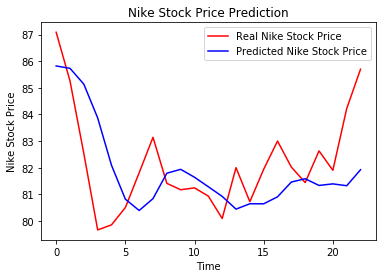

In [127]:
#Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real Nike Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Nike Stock Price')
plt.title('Nike Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Nike Stock Price')
plt.legend()
plt.show()

The prediction lags behind the actual price curve because the model cannot react to fast non-linear changes. Spikes are examples of fast non-linear changes, and there are a few steep ones.  
Model reacts pretty well to smooth changes.
To receive better results, we can always can add more hidden layers to the network and that would improve the predictions, but will get closer to overfitting.